# Import

In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Load Dataset

In [4]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

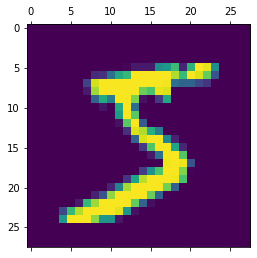

In [6]:
plt.matshow(X_train[0])

# Preprocessing

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

# Build, Compile & Fit NN model

In [56]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])

In [59]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [60]:
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 935us/step - loss: 17.8304 - accuracy: 0.7690
Epoch 2/5
1875/1875 [==============================] - 2s 904us/step - loss: 6.1661 - accuracy: 0.8772
Epoch 3/5
1875/1875 [==============================] - 2s 904us/step - loss: 5.4362 - accuracy: 0.8856
Epoch 4/5
1875/1875 [==============================] - 2s 909us/step - loss: 5.4774 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 2s 865us/step - loss: 5.4713 - accuracy: 0.8838


# Evaluate, Predict

In [61]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 936us/step - loss: 5.4424 - accuracy: 0.8955


[5.442409992218018, 0.8955000042915344]

In [62]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

Predicted Label:1


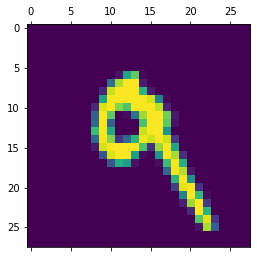

In [63]:
n = 7
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

# Plot Confusion Matrix

In [64]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)

Text(69.0, 0.5, 'Truth')

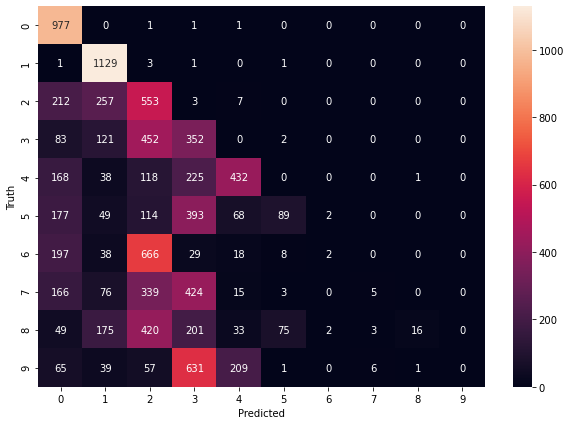

In [65]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Repeat with Scaled Data

In [86]:
X_train_flattened = X_train_flattened / 255
X_test_flattened = X_test_flattened / 255

In [87]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.7304 - accuracy: 0.8099
Epoch 2/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.3085 - accuracy: 0.9142
Epoch 3/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2902 - accuracy: 0.9189
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.9216
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2641 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2564 - accuracy: 0.9293
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2481 - accuracy: 0.9321
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2498 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss:

In [88]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.2651 - accuracy: 0.9279


[0.26505300402641296, 0.9279000163078308]

In [89]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Predicted Label:7


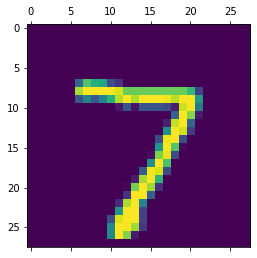

In [90]:
n = 0
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

Text(69.0, 0.5, 'Truth')

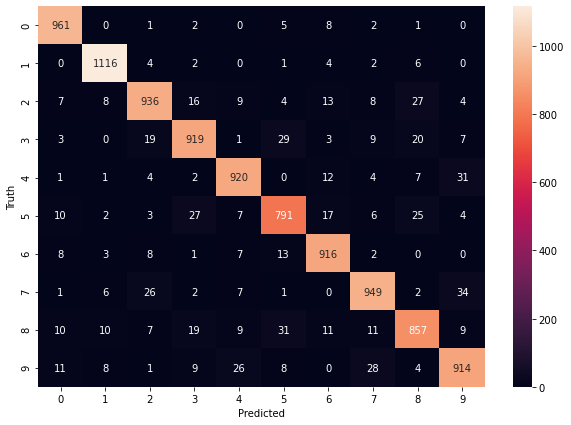

In [91]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Repeat with one hidden layer

In [92]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.8725
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1341 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0895 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0402 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0207 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [93]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9770


[0.08067189902067184, 0.9769999980926514]

In [94]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Predicted Label:7


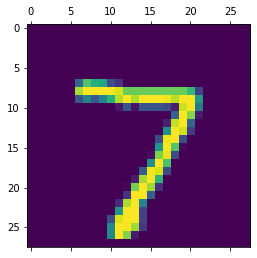

In [95]:
n = 0
plt.matshow(X_test[n])
print("Predicted Label:" + str(Y_predicted_labels[n]))

Text(69.0, 0.5, 'Truth')

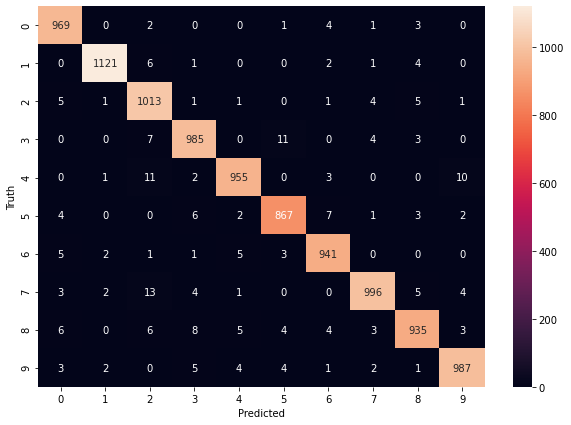

In [96]:
cm = tf.math.confusion_matrix(Y_test, Y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')